$
Assesment 2
$
<br>
$
\Huge Name-S.P.Prathapasinghe
$
<br>
$
Index No.-190470X
$
<br>
$
Github Link-https://github.com/PrathapasingheSP99/Image-Processing.git
$

In [2]:
import numpy as np 
from scipy.optimize import minimize 
from scipy import linalg 
import matplotlib.pyplot as plt
import random
import cv2 as cv



$
\Huge Q1
$


Random sample consensus (RANSAC) is an iterative method for estimating mathematical models based on datasets containing deviations. The RANSAC algorithm works by identifying the deviations in the dataset and using the data that does not contain the deviations to estimate the model of interest. Here in this problem we have to modify the RANSAC algorithm to estimate a circle which usually use for estimating lines. I've implemented that line estimating code as well. Method used here for estimating circle is get random 5 points from data set and estimate the circle. Find parameters using matrix method. Getting random samples and estimate circle 50 times and calculate error of the sample data set to the estimated circle. Find the circle with minimum error.

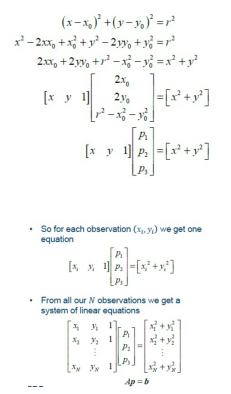

In [3]:
im=cv.imread('1.jpg')
im1=cv.imread('2.jpg')
fig, ax = plt.subplots(2, 1, figsize = (14,7))
ax[0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(im1,cv.COLOR_BGR2RGB))
ax[0].axis('off')
ax[1].axis('off')
plt.show()

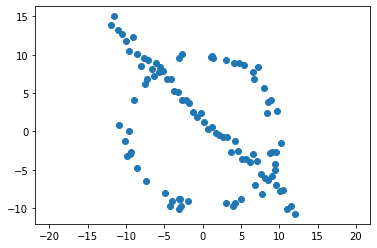

In [4]:
# np.random. seed (0)
N = 100
half_n = N//2 
r = 10 
s = r/16 
t = np.random.uniform(0 , 2*np. pi , half_n )
n = s*np.random. randn( half_n ) 
x,y = (r+n)*np.cos(t),(r+n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
m,b = -1,2
x=np.linspace(-12,12,half_n) 
y = m*x+b+s*np.random.randn(half_n )
X_line=np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
X=np.vstack((X_circ,X_line))
plt.scatter(X[:,0],X[:,1])
plt.axis('equal')
plt.show()


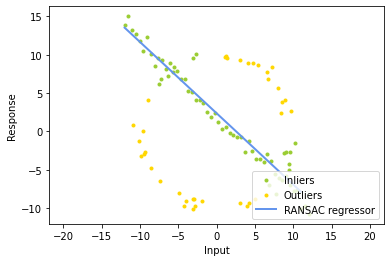

In [5]:
from sklearn import linear_model

X1=X[:,0].reshape(-1,1)
X2=X[:,1].reshape(-1,1)
#print(X1)

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X1,X2)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(X1.min(), X1.max())[:, np.newaxis]
line_y_ransac = ransac.predict(line_X)

lw = 2
plt.scatter(X1[inlier_mask], X2[inlier_mask], color="yellowgreen", marker=".", label="Inliers")
plt.scatter(X1[outlier_mask], X2[outlier_mask], color="gold", marker=".", label="Outliers")

plt.plot(line_X,line_y_ransac,color="cornflowerblue",linewidth=lw,label="RANSAC regressor")
plt.axis('equal')
plt.legend(loc="lower right")
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()

In [6]:
from numpy.linalg import inv
def Estimate_Circle(Rando):
    x0, y0 = Rando[0]
    x1, y1 = Rando[1]
    x2, y2 = Rando[2]
    x3, y3 = Rando[3]
    x4, y4 = Rando[4]
    A=np.array([[x0,y0,1], [x1, y1,1],[x2,y2,1],[x3,y3,1], [x4, y4,1]])
    B=inv(np.matmul(A.T,A))
    C=np.array([[x0**2+y0**2],[x1**2+y1**2],[x2**2+y2**2],[x3**2+y3**2],[x4**2+y4**2]])
    P=np.matmul(np.matmul(B,A.T),C)
    Center_x=P[0]/2
    Center_y=P[1]/2
    radius=np.sqrt(Center_x**2+Center_y**2+P[2])
    return Center_x,Center_y,radius,P

#Center_x,Center_y,radius,P=Estimate_Circle(3,3,3,4,4,3)

In [7]:
def How_close(X,P,radius):
    Res=np.abs(np.sqrt( (X[:, 0] - P[0]/2)**2 + (X[:, 1] - P[1]/2)**2) - radius)
    return np.sum(Res),np.argsort(Res)[:50]
#How_close(X,P)

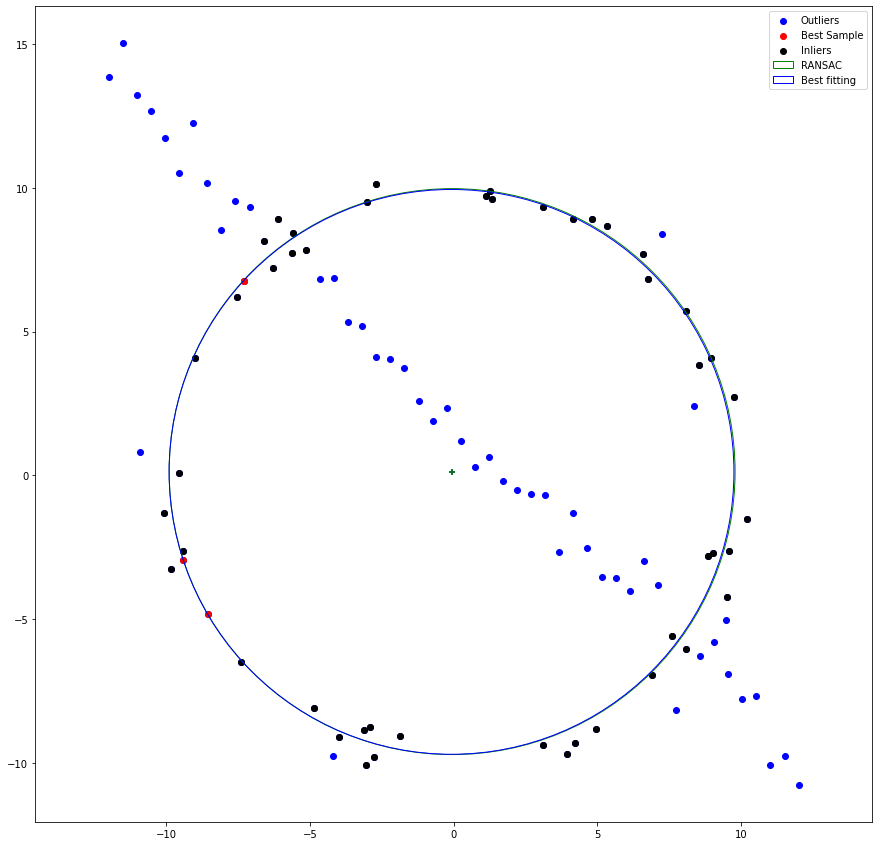

In [8]:
def RANSAC_circle(Cords ):
       
    it = 0
    prev_rating=0
    while it < 50:
        it += 1

        #print(it)
        ind = random.sample(range(0, len(Cords)), 5)
        #print(Cords[ind[0]])
        Rando = np.array([Cords[ind[0]],Cords[ind[1]],Cords[ind[2]],Cords[ind[3]],Cords[ind[4]]])
        Center_x,Center_y,radius,P = Estimate_Circle(Rando)
        Rating,Best_Sample_indexes=How_close(Cords,P,radius)
        #print(np.append(Center_x,Rating))
        if it==1 or (prev_rating>Rating and Rating>0):
            prev_rating=Rating
            Circle=[Center_x,Center_y,radius]
            new_best=Best_Sample_indexes
    return Circle,new_best

fig, ax = plt.subplots(1, 1, figsize = (15, 15))
ax.axis('equal')
ax.scatter(X[:, 0], X[:, 1], c='b', marker='o', label="Outliers")


ccl,Best=RANSAC_circle(X)
best_fitting = plt.Circle((ccl[0], ccl[1]), radius=ccl[2], color='b', fc='y', fill=False, label='Best fitting')

a1,b1,r1,P1=Estimate_Circle([X[Best[0]],X[Best[1]],X[Best[2]],X[Best[3]],X[Best[4]]])
sample_circle = plt.Circle((a1, b1), radius=r1, color='g', fc='y', fill=False, label='RANSAC')

for k in range(50):
    if k==0:
        ax.scatter(X[Best[k]][0], X[Best[k]][1], c='r', marker='o', label= "Best Sample")
    if k<3:
        ax.scatter(X[Best[k]][0], X[Best[k]][1], c='r', marker='o')
    elif k==5:
        ax.scatter(X[Best[k]][0], X[Best[k]][1], c='k', marker='o', label= "Inliers")
    else:
        ax.scatter(X[Best[k]][0], X[Best[k]][1], c='k', marker='o')

plt.gca().add_patch(sample_circle)
plt.gca().add_patch(best_fitting)
ax.scatter(ccl[0], ccl[1], c='b', marker='+')
ax.scatter(a1, b1, c='g', marker='+')
ax.legend()
plt.show()


$
\Huge Q2
$

Where to superimpose the flag is determine from mouse clicking on the image. The pixel coordinates selected are thaken into a matrix and using homography method the flag coordinate system is transformed. We can use cv.addWeighted function to superimpose the transformed flag image into the main image with desired amount of appearance of flag.The formula we can use is as follows.

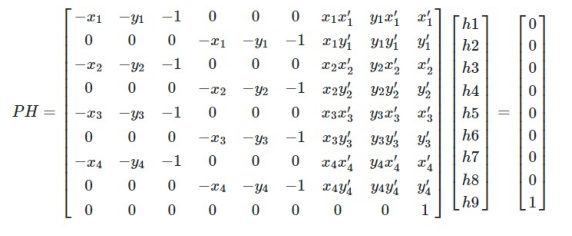

In [9]:
im=cv.imread('3.jpg')
#im1=cv.imread('2.jpg')
fig, ax = plt.subplots(1, 1, figsize = (10,10))
ax.imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
#ax[1].imshow(cv.cvtColor(im1,cv.COLOR_BGR2RGB))
ax.axis('off')
#ax[1].axis('off')
plt.show()

In [10]:
def clicked(event, x, y, flags, params):
    global clicks
    global pos
    if event == cv.EVENT_LBUTTONDOWN and clicks < 4:
        pos = np.vstack((pos, [x, y]))
        cv.circle(img,(x,y),8,(0,255,150),-1)
        cv.putText(img, "P{}".format(clicks), (x+10,y+10), cv.FONT_ITALIC, 1, (150,0,0), 2)
        cv.imshow('image', img)
        clicks += 1

In [66]:
def compute_Homography(pts1,pts2):
    A = []
    b = []
    for i in range(len(pts1)):
        s_x, s_y = pts1[i]
        d_x, d_y = pts2[i]
        A.append([-s_x, -s_y, -1, 0, 0, 0, (d_x)*(s_x), (d_x)*(s_y),d_x])
        A.append([0, 0, 0, -s_x, -s_y, -1, (d_y)*(s_x), (d_y)*(s_y),d_y])
    A = np.array(A)
    A=np.append(A,np.array([[0,0,0,0,0,0,0,0,1]]),axis=0)
    B=[0 for i in range(A.shape[0]-1)]
    B.append(1)
    B=np.array(B)
    B=B.reshape(-1,1)
    #print(B)
    #print(A.shape,len(pts1))
    A1=np.matmul(A.T,A)
    h = np.matmul(np.matmul(inv(A1),A.T),B)
    #print(h)
    return np.reshape(h, (3, 3))


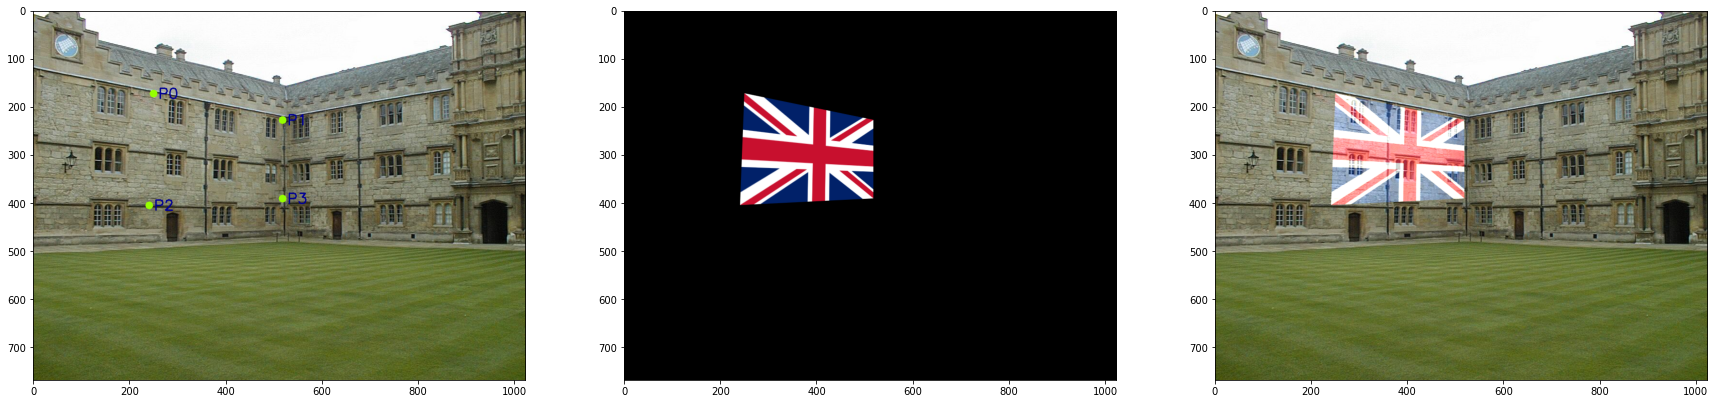

In [160]:
pos=np.empty((0,2))
clicks=0


img = cv.imread('001.jpg') 
img_1 = img.copy()

cv.imshow('image', img); cv.setMouseCallback('image', clicked); cv.waitKey(0); cv.destroyAllWindows()
flag = cv.imread('Flag.png') 
#print(flag.shape)
H,W,c=flag.shape

pts1=np.float32([[0,0],[W,0],[0,H],[W,H]])
pts2=np.float32(pos)
matrix=compute_Homography(pts1,pts2)
flag_Output=cv.warpPerspective(flag,matrix,img.shape[1::-1],)
#print(pts1,pts2,matrix)
Out=cv.addWeighted(img_1,1,flag_Output,0.7,0)

fig, ax = plt.subplots(1, 3, figsize = (30, 80))
ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(flag_Output,cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(Out,cv.COLOR_BGR2RGB))
plt.show()


$
\Huge Q3
$

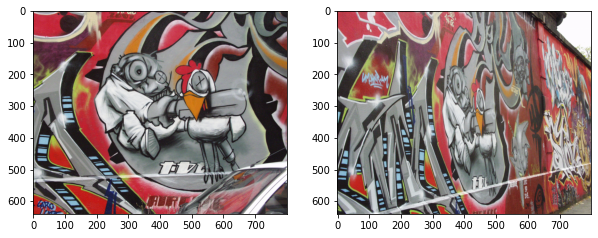

In [167]:
im1=cv.imread('img1.ppm')
im2=cv.imread('img5.ppm')
fig, ax = plt.subplots(1, 2, figsize = (10, 20))
ax[0].imshow(cv.cvtColor(im1,cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(im2,cv.COLOR_BGR2RGB))
plt.show()

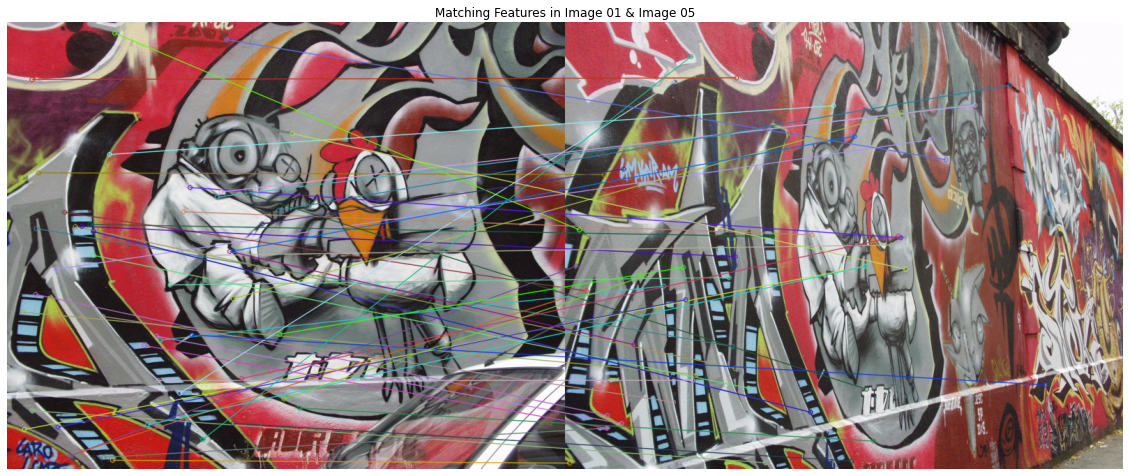

In [171]:
sift = cv.SIFT_create()
kp1 , decs1 = sift.detectAndCompute(im1,None)
kp2 , decs2 = sift.detectAndCompute(im2,None)

FLANN_INDEX_KDTREE = 0
index_paras = dict(algorithm = FLANN_INDEX_KDTREE , trees =5)
search_paras = dict(checks = 100)

flann =  cv.FlannBasedMatcher(index_paras,search_paras)
matches = flann.knnMatch(decs1,decs2, k=2)

good=[]
points1=[]
points2=[]

for m, n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
        points1.append(kp1[m.queryIdx].pt)
        points2.append(kp2[m.trainIdx].pt)

draw_params = dict(matchesMask = good, flags = 2)

good=np.array(good)
points1=np.array(points1)
points2=np.array(points2)
im3 = cv.drawMatchesKnn(im1,kp1,im2,kp2,good[:50], None, flags=2)

fig = plt.figure(figsize = (20,20))
plt.imshow(cv.cvtColor(im3,cv.COLOR_BGR2RGB))
plt.title("Matching Features in Image 01 & Image 05")
plt.axis('off')
plt.show()

In [173]:
def Dis(P1, P2, H):
    p1 = np.array([P1[0], P1[1], 1])
    p2 = np.array([P2[0], P2[1], 1])

    p2_estimate = np.dot(H, p1.T)
    #print(p2_estimate)
    p2_estimate = (1 / p2_estimate[2]) * p2_estimate
    return np.linalg.norm(p2.T - p2_estimate)

In [174]:
def RANSAC_Homo(Cords1,Cords2 ):
    it = 0
    c=0
    prev_rating=0
    while it < 50:
        it += 1

        #print(it)
        ind_4_pts1 = random.sample(range(0, len(Cords1)), 4)
        ind_4_pts2 = random.sample(range(0, len(Cords2)), 4)
        #print(Cords[0])
        pts1 = np.array([Cords1[ind_4_pts1[0]],Cords1[ind_4_pts1[1]],Cords1[ind_4_pts1[2]],Cords1[ind_4_pts1[3]]])
        pts2 = np.array([Cords2[ind_4_pts2[0]],Cords2[ind_4_pts2[1]],Cords2[ind_4_pts2[2]],Cords2[ind_4_pts2[3]]])
        matrix=compute_Homography(pts1,pts2)
        Inlier = np.array([(Cords1[i], Cords2[i]) for i in range(len(Cords1)) if Dis(Cords1[i], Cords2[i], matrix) < 100])
        if len(Inlier) > c:
            c = len(Inlier)
        #print(np.append(Center_x,Rating))
    matrix=compute_Homography(Inlier[:,0],Inlier[:,1])
    return matrix

In [179]:
#print(pts1[0])
H=RANSAC_Homo(points1, points2 )
print("Homography matrix from RANSAC algorithm")
print(H)
H1to5_Datasheet=np.array([[6.2544644e-01  ,5.7759174e-02   ,2.2201217e+02],
   [2.2240536e-01   ,1.1652147e+00  ,-2.5605611e+01],
   [4.9212545e-04  ,-3.6542424e-05   ,1.0000000e+00]])
print("\n\nHomography matrix from datasheet")
print(H1to5_Datasheet)

Homography matrix from RANSAC algorithm
[[-4.81343664e-05 -5.80432516e-05  4.24536921e-02]
 [-1.03494827e-04 -1.14485737e-04  8.18361677e-02]
 [-2.59651924e-07 -3.04025116e-07  2.10336828e-04]]


Homography matrix from datasheet
[[ 6.2544644e-01  5.7759174e-02  2.2201217e+02]
 [ 2.2240536e-01  1.1652147e+00 -2.5605611e+01]
 [ 4.9212545e-04 -3.6542424e-05  1.0000000e+00]]


In [ ]:
A = np.array([1, 7, 0, 2, 0.1, 17, 17, 1.5])
print(A.argmin())
idx = np.argsort(A)[:3]
print(idx)
print("Homography matrix from RANSAC algorithm")

2
[2 4 0]
